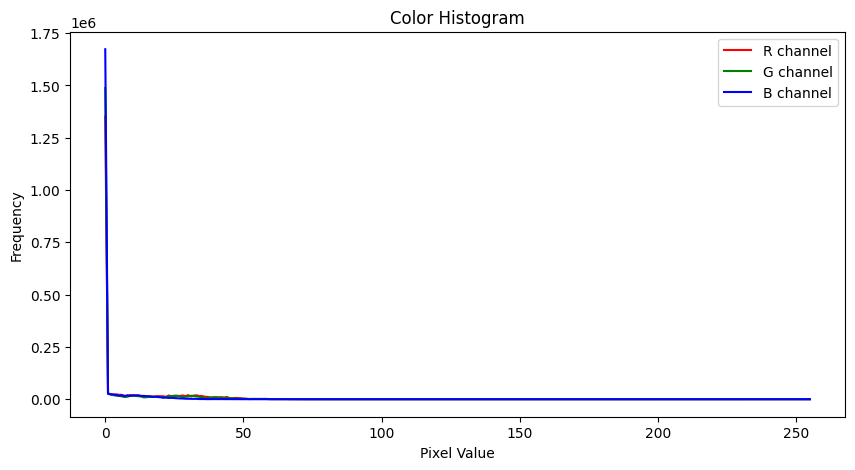

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("dark_room.png")  # Replace with your image path
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct color representation

# Split channels
channels = ('r', 'g', 'b')
colors = ('red', 'green', 'blue')

# Plot histograms
plt.figure(figsize=(10, 5))
for i, (color, ch) in enumerate(zip(colors, channels)):
    hist = cv2.calcHist([rgb_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f"{ch.upper()} channel")
    
plt.title("Color Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


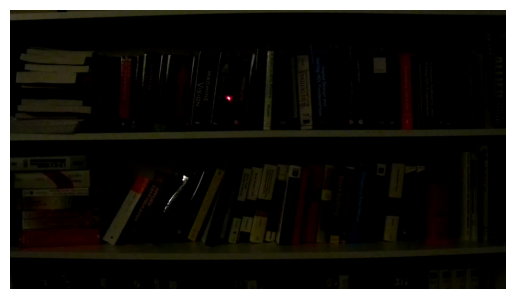

In [2]:
plt.imshow(rgb_image)
plt.axis('off')
plt.show()


# Gray Channel

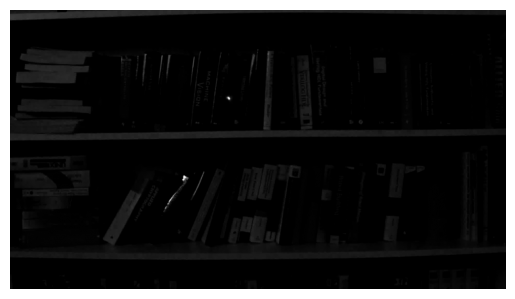

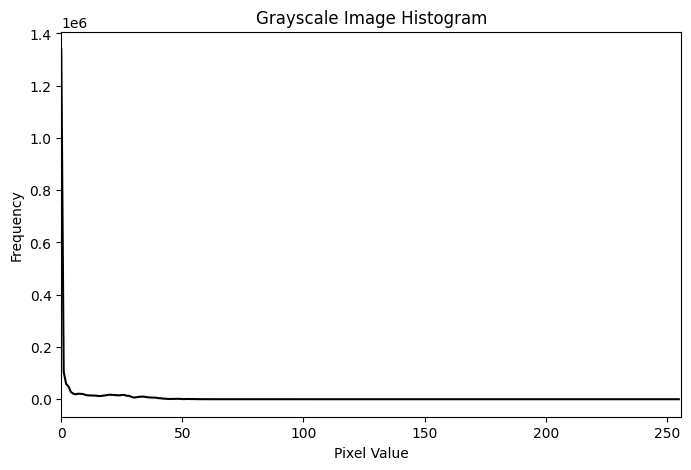

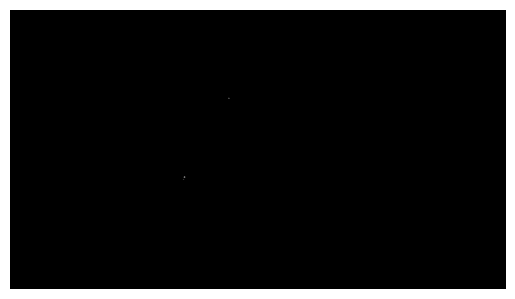

In [3]:
blurred_image = cv2.GaussianBlur(rgb_image, (3, 3), 0)
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 5))
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(hist, color='black')
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.show()

threshold_value = 250
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

# Red Channel

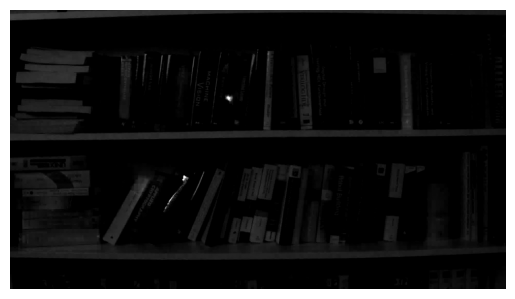

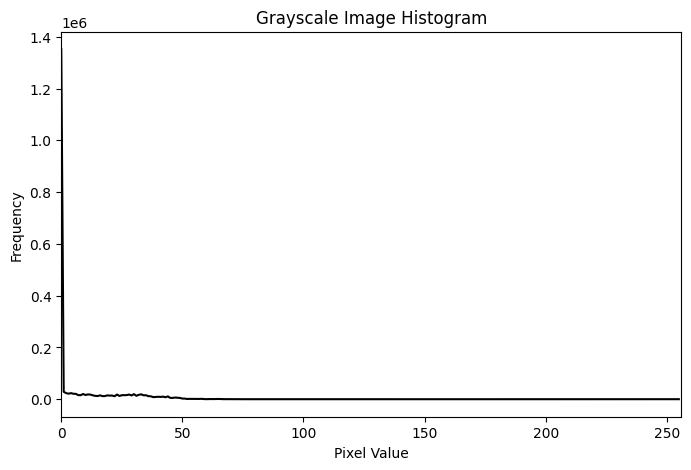

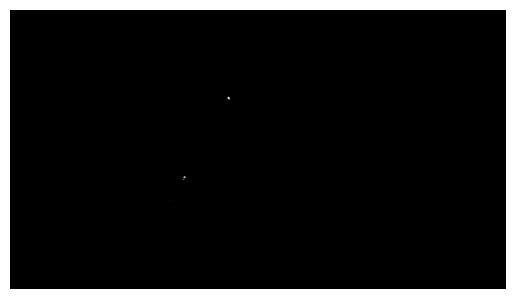

In [4]:
red_channel = rgb_image[:, :, 0]

plt.imshow(red_channel, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 5))
hist = cv2.calcHist([red_channel], [0], None, [256], [0, 256])
plt.plot(hist, color='black')
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.show()

threshold_value = 254
_, binary_image = cv2.threshold(red_channel, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()



# Green Channel

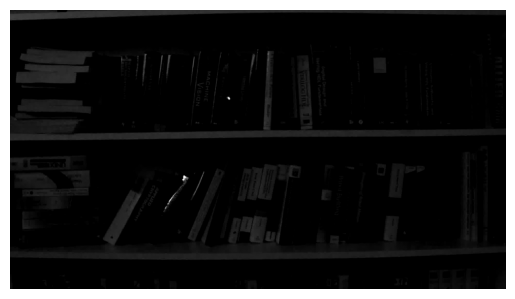

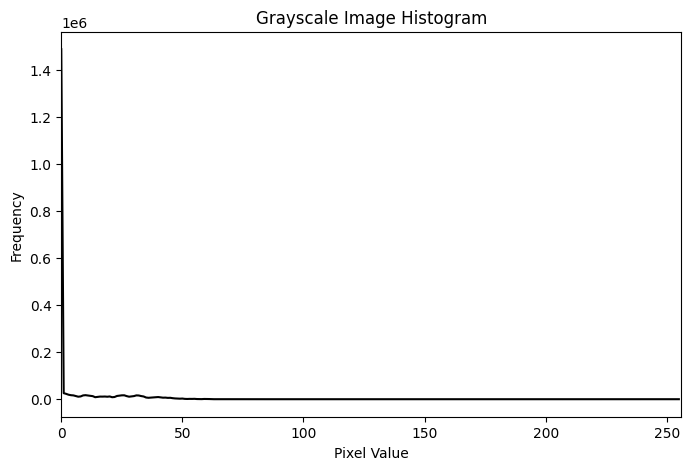

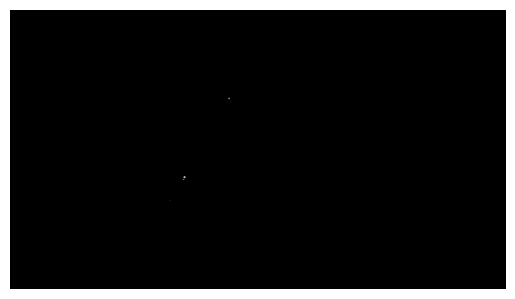

In [5]:
green_channel = rgb_image[:, :, 1]

plt.imshow(green_channel, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 5))
hist = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
plt.plot(hist, color='black')
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.show()

threshold_value = 250
_, binary_image = cv2.threshold(green_channel, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

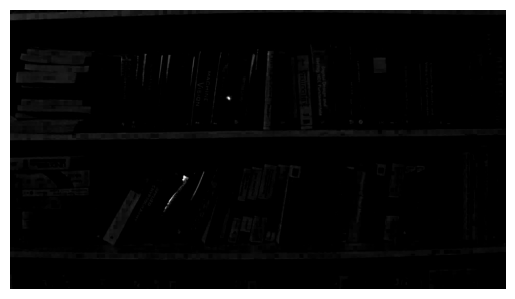

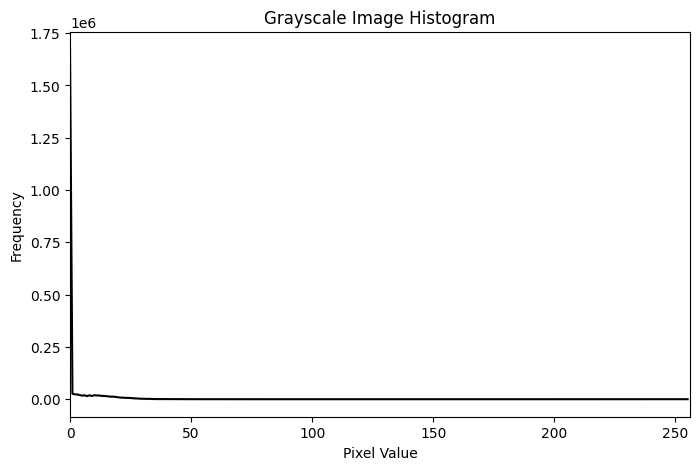

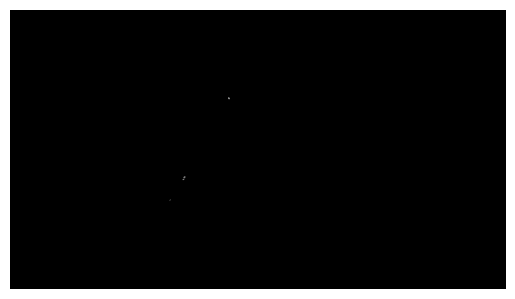

In [6]:
blue_channel = rgb_image[:, :, 2]

plt.imshow(blue_channel, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 5))
hist = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
plt.plot(hist, color='black')
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.show()

threshold_value = 250
_, binary_image = cv2.threshold(blue_channel, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

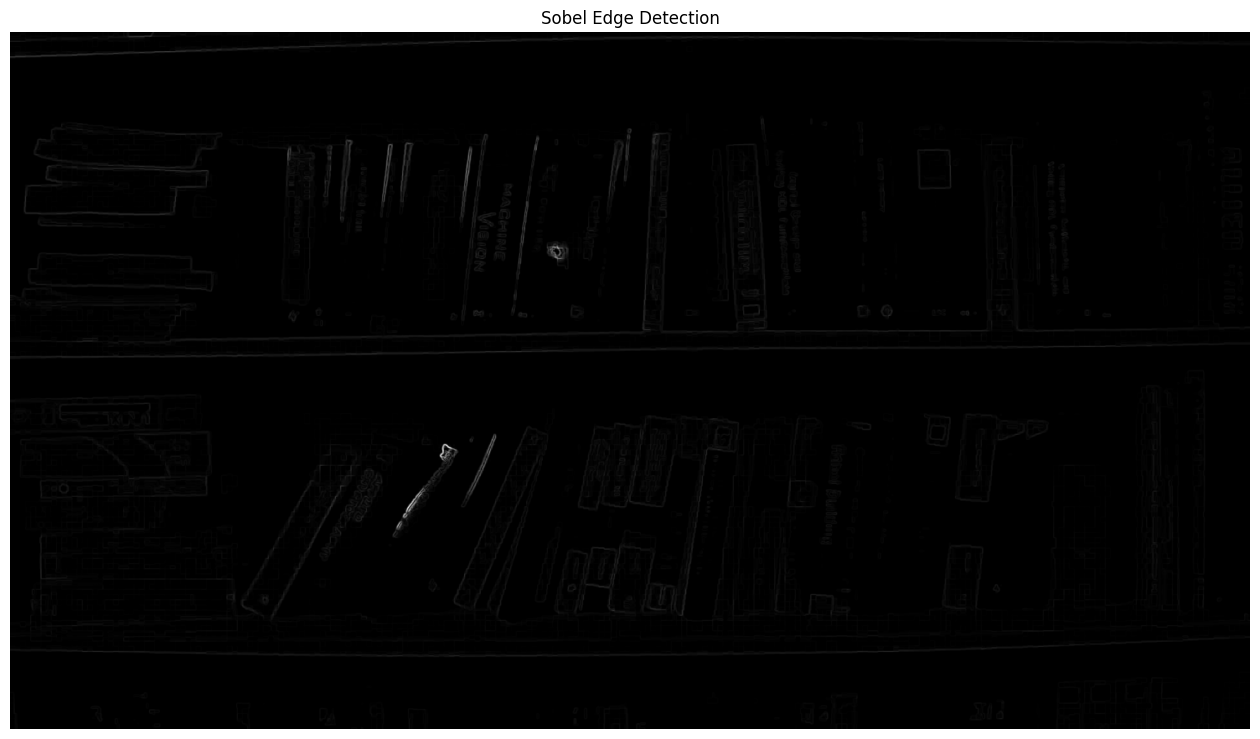

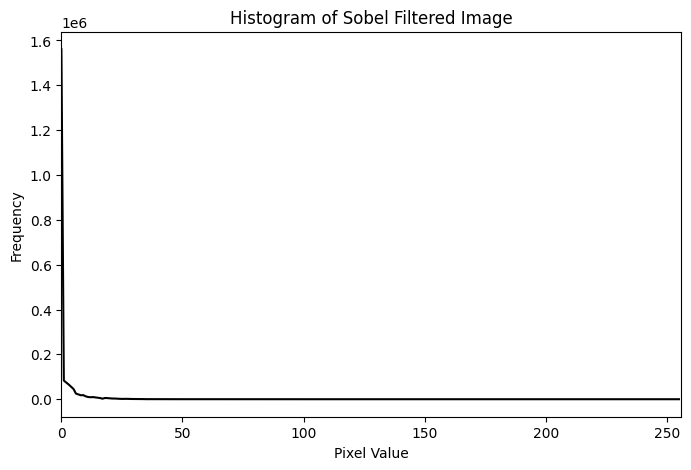

In [7]:

# Extract the red channel
red_channel = rgb_image[:, :, 0]

threshold_value = 250
_, binary_image = cv2.threshold(red_channel, threshold_value, 255, cv2.THRESH_BINARY)

# Apply Sobel operator
sobel_x = cv2.Sobel(red_channel, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(red_channel, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize to [0, 255] and convert to uint8
sobel_magnitude = np.uint8(255 * (sobel_magnitude / np.max(sobel_magnitude)))

# Display Sobel result
plt.figure(figsize=(16, 10))

plt.imshow(sobel_magnitude, cmap='gray')
plt.axis('off')
plt.title("Sobel Edge Detection")
plt.show()

# Compute histogram of the Sobel-filtered image
plt.figure(figsize=(8, 5))
hist = cv2.calcHist([sobel_magnitude], [0], None, [256], [0, 256])
plt.plot(hist, color='black')
plt.title("Histogram of Sobel Filtered Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.show()


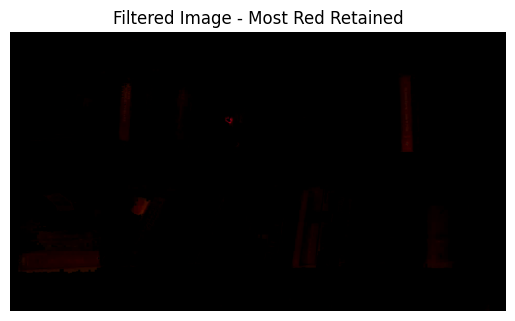

In [8]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert OpenCV BGR to RGB

# Extract color channels
red = rgb_image[:, :, 0].astype(np.float32)
green = rgb_image[:, :, 1].astype(np.float32)
blue = rgb_image[:, :, 2].astype(np.float32)

# Compute Red Dominance
red_dominance = (red - np.maximum(green, blue)) / (red + 1)

# Normalize to range [0, 255]
red_dominance = cv2.normalize(red_dominance, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply threshold to isolate the most red-intense regions
_, threshold_mask = cv2.threshold(red_dominance, 250, 255, cv2.THRESH_BINARY)

# Remove the less red point by keeping only the most dominant red regions
filtered_image = cv2.bitwise_and(rgb_image, rgb_image, mask=threshold_mask)

# Display the filtered image
plt.imshow(filtered_image)
plt.axis('off')
plt.title("Filtered Image - Most Red Retained")
plt.show()

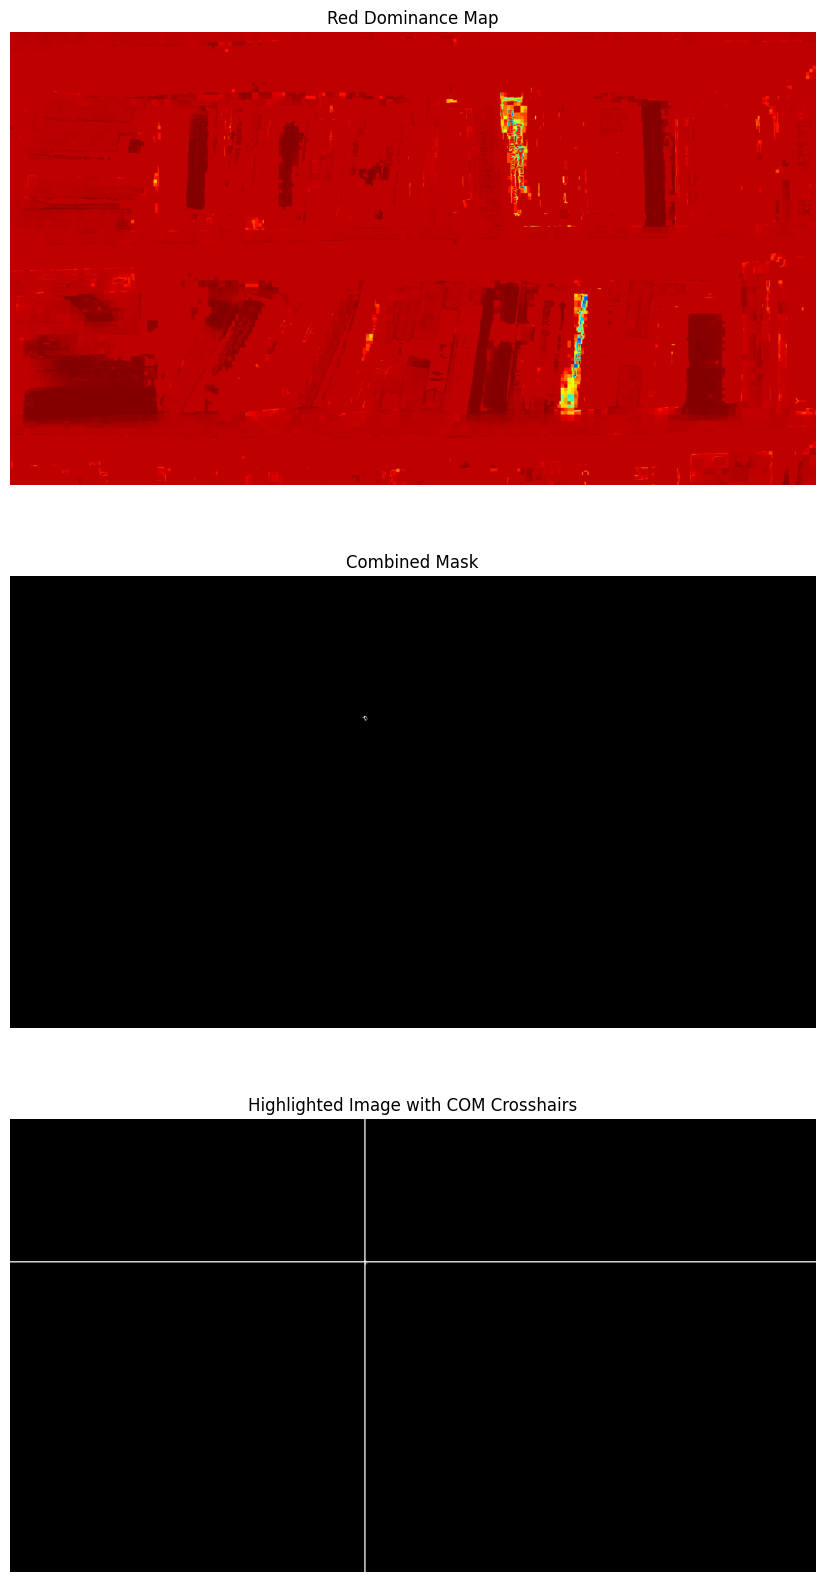

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Extract color channels
red = rgb_image[:, :, 0].astype(np.float32)
green = rgb_image[:, :, 1].astype(np.float32)
blue = rgb_image[:, :, 2].astype(np.float32)

# Compute Red Dominance
red_dominance = (red - np.maximum(green, blue)) / (red + 1)

# Normalize red dominance to [0, 255]
red_dominance = cv2.normalize(red_dominance, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Threshold red dominance (keep highly red regions)
_, red_dominance_mask = cv2.threshold(red_dominance, 241, 255, cv2.THRESH_BINARY)

# Threshold red intensity (keep bright red regions)
_, red_intensity_mask = cv2.threshold(red.astype(np.uint8), 250, 255, cv2.THRESH_BINARY)

# Combine both masks using bitwise AND
combined_mask = cv2.bitwise_and(red_dominance_mask, red_intensity_mask)

# Compute Center of Mass (COM) using image moments
moments = cv2.moments(combined_mask)
if moments["m00"] != 0:
    x_bar = int(moments["m10"] / moments["m00"])  # X Center of Mass
    y_bar = int(moments["m01"] / moments["m00"])  # Y Center of Mass
else:
    x_bar, y_bar = 0, 0  # Default in case no bright pixels are detected

# Draw X and Y crosshair lines at (x_bar, y_bar)
highlighted_image = cv2.bitwise_and(rgb_image, rgb_image, mask=combined_mask)
crosshair_image = highlighted_image.copy()

# Draw horizontal and vertical lines
height, width, _ = highlighted_image.shape
cv2.line(crosshair_image, (0, y_bar), (width, y_bar), (255, 255, 255), 2)  # Horizontal
cv2.line(crosshair_image, (x_bar, 0), (x_bar, height), (255, 255, 255), 2)  # Vertical

# Display results
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
plt.imshow(red_dominance, cmap="jet")
plt.axis("off")
plt.title("Red Dominance Map")

plt.subplot(3, 1, 2)
plt.imshow(combined_mask, cmap="gray")
plt.axis("off")
plt.title("Combined Mask")

plt.subplot(3, 1, 3)
plt.imshow(crosshair_image)
plt.axis("off")
plt.title("Highlighted Image with COM Crosshairs")

plt.show()


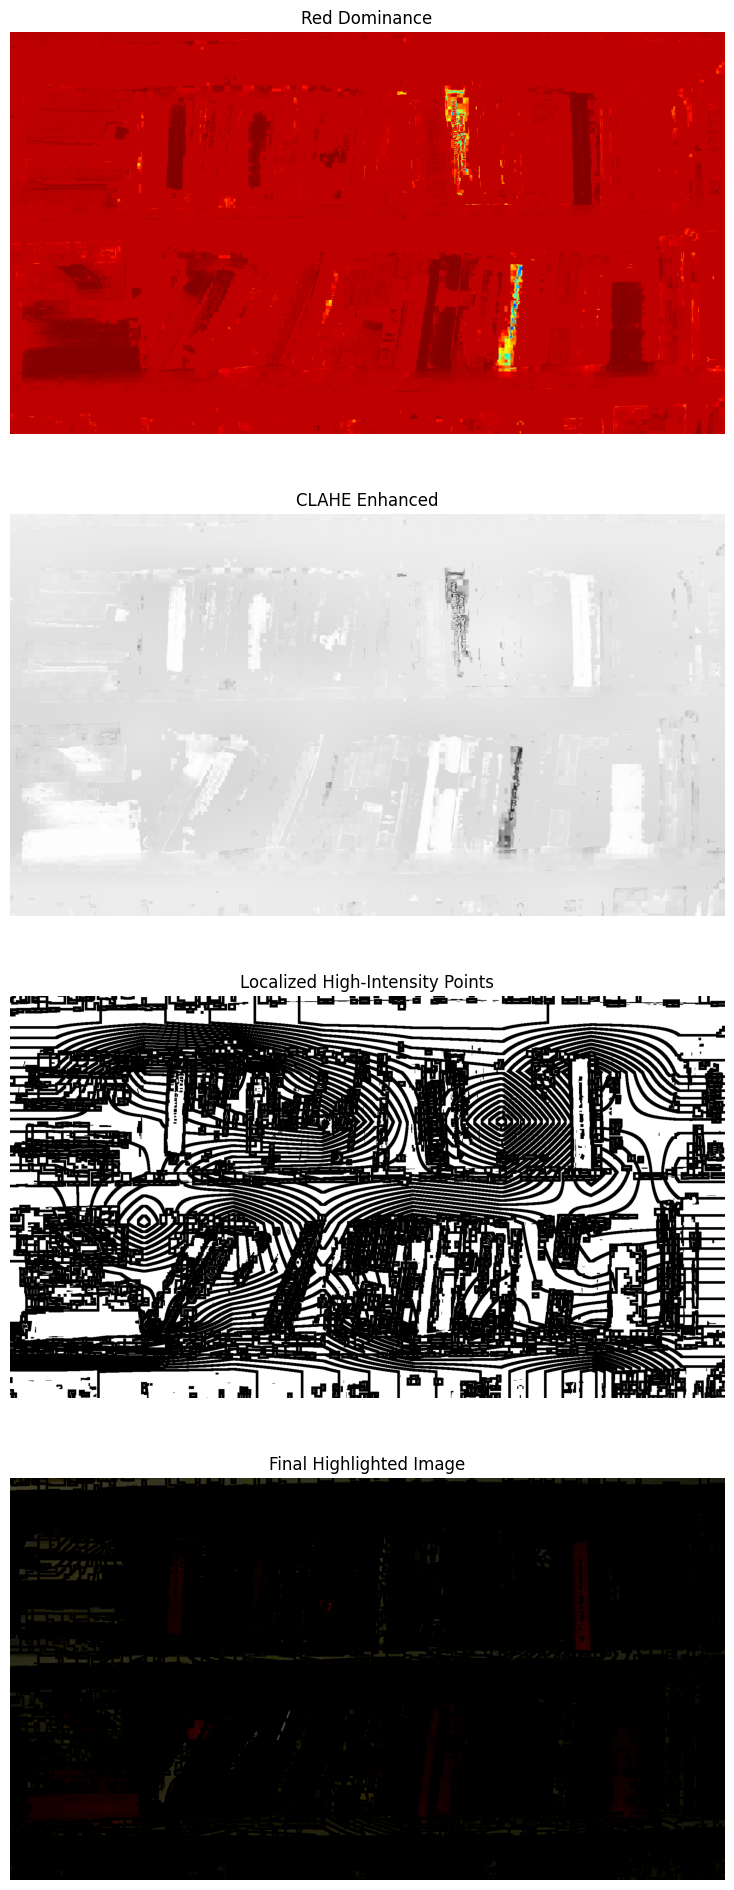

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter

# Extract color channels
red = rgb_image[:, :, 0].astype(np.float32)
green = rgb_image[:, :, 1].astype(np.float32)
blue = rgb_image[:, :, 2].astype(np.float32)

# Compute Red Dominance
red_dominance = (red - np.maximum(green, blue)) / (red + 1)

# Normalize red dominance to [0, 255]
red_dominance = cv2.normalize(red_dominance, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) for localized enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
red_enhanced = clahe.apply(red_dominance)

# Adaptive thresholding for localized high-intensity points
adaptive_thresh = cv2.adaptiveThreshold(
    red_enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Use a maximum filter to detect local maxima
local_maxima = (red_enhanced == maximum_filter(red_enhanced, size=15)) & (red_enhanced > 180)

# Convert boolean mask to uint8 image
local_maxima = (local_maxima * 255).astype(np.uint8)

# Apply mask to highlight localized bright red spots
localized_highlight = cv2.bitwise_and(rgb_image, rgb_image, mask=local_maxima)

# Display results
plt.figure(figsize=(24, 24))

plt.subplot(4, 1, 1)
plt.imshow(red_dominance, cmap="jet")
plt.axis("off")
plt.title("Red Dominance")

plt.subplot(4, 1, 2)
plt.imshow(red_enhanced, cmap="gray")
plt.axis("off")
plt.title("CLAHE Enhanced")

plt.subplot(4, 1, 3)
plt.imshow(local_maxima, cmap="gray")
plt.axis("off")
plt.title("Localized High-Intensity Points")

plt.subplot(4, 1, 4)
plt.imshow(localized_highlight)
plt.axis("off")
plt.title("Final Highlighted Image")

plt.show()
